In [1]:
from scipy import stats

In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
spy_etf = yf.download('SPY', start='2010-01-01', end='2017-07-18')
print(spy_etf.info())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1897 entries, 2010-01-04 to 2017-07-17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   1897 non-null   float64
 1   (High, SPY)    1897 non-null   float64
 2   (Low, SPY)     1897 non-null   float64
 3   (Open, SPY)    1897 non-null   float64
 4   (Volume, SPY)  1897 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 88.9 KB
None


In [29]:
spy_etf.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2010-01-04,86.026451,86.071994,84.644927,85.297736,118944600
2010-01-05,86.254173,86.292130,85.662092,85.973318,111579900
2010-01-06,86.314888,86.527429,86.102347,86.170661,116074400
2010-01-07,86.679260,86.785531,85.912589,86.155494,131091100
2010-01-08,86.967697,87.005653,86.276938,86.451523,126402800


In [30]:
aapl = yf.download('AAPL', start='2010-01-01', end='2017-07-18')
print(aapl.info())


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1897 entries, 2010-01-04 to 2017-07-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1897 non-null   float64
 1   (High, AAPL)    1897 non-null   float64
 2   (Low, AAPL)     1897 non-null   float64
 3   (Open, AAPL)    1897 non-null   float64
 4   (Volume, AAPL)  1897 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 88.9 KB
None


In [31]:
aapl.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447411,6.462173,6.398304,6.429937,493729600
2010-01-05,6.458559,6.495012,6.424515,6.465187,601904800
2010-01-06,6.355826,6.484166,6.349198,6.458558,552160000
2010-01-07,6.344078,6.386859,6.297984,6.379327,477131200
2010-01-08,6.386255,6.386858,6.298286,6.335642,447610800


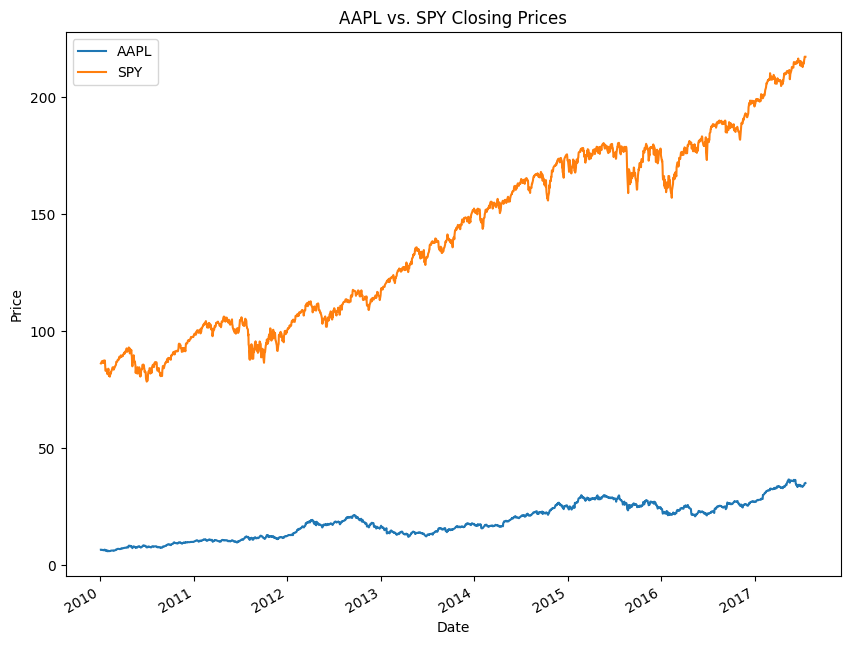

In [35]:
import matplotlib.pyplot as plt

plt.close('all')  # Clear previous figures

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot both datasets on the same axis
aapl['Close'].plot(ax=ax, label='AAPL')
spy_etf['Close'].plot(ax=ax, label='SPY')

# Add labels and title
ax.set_title('AAPL vs. SPY Closing Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Show the combined plot
plt.show()


In [36]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

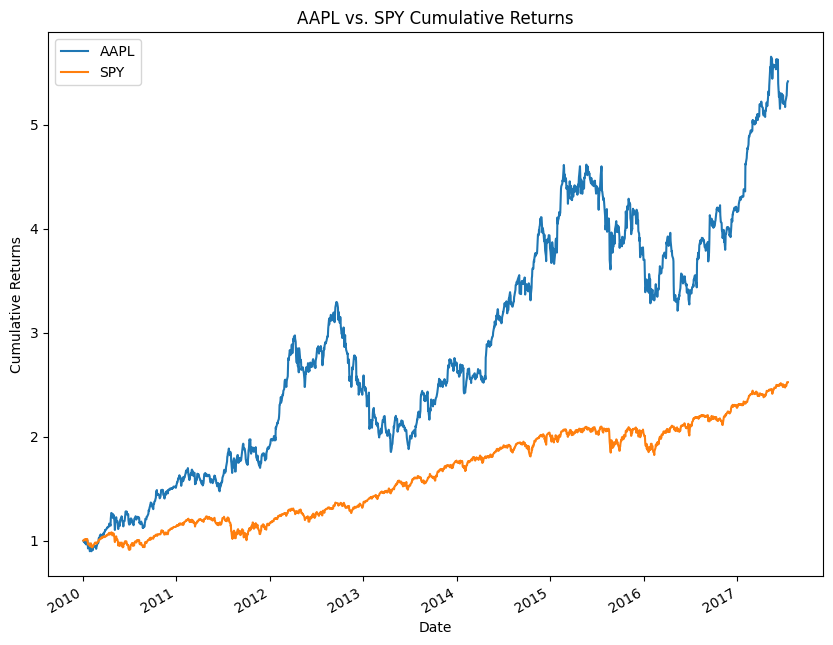

In [38]:
import matplotlib.pyplot as plt

plt.close('all')  # Clear previous figures

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot both datasets on the same axis
aapl['Cumulative'].plot(ax=ax, label='AAPL')
spy_etf['Cumulative'].plot(ax=ax, label='SPY')

# Add labels and title
ax.set_title('AAPL vs. SPY Cumulative Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.legend()

# Show the combined plot
plt.show()


In [39]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

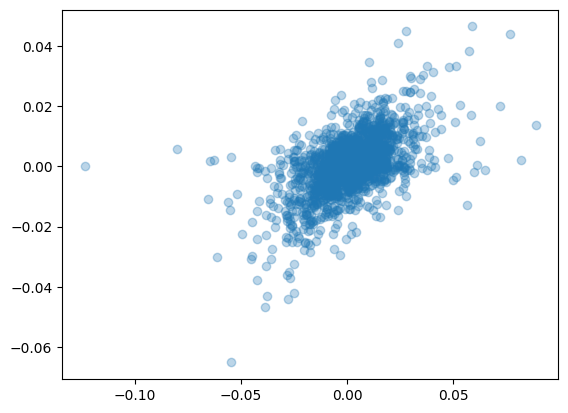

In [40]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

<Axes: >

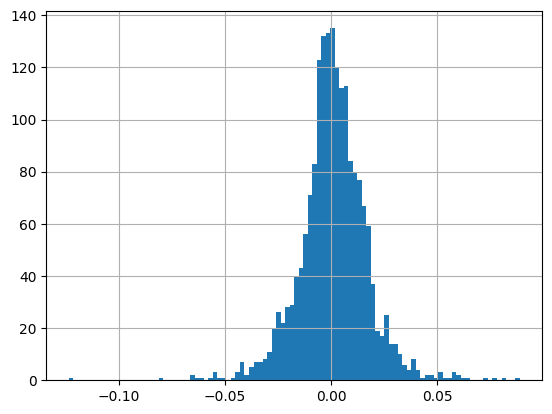

In [41]:
aapl['Daily Return'].hist(bins=100)

<Axes: >

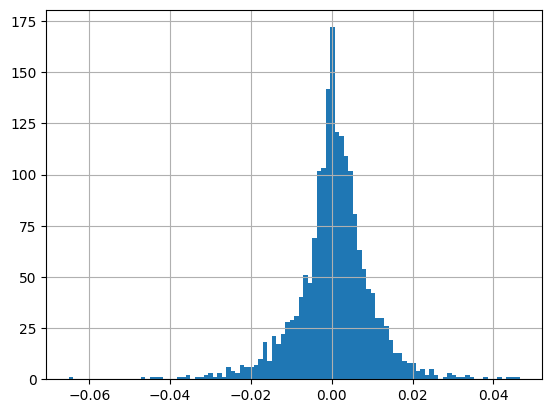

In [42]:
spy_etf['Daily Return'].hist(bins=100)

In [43]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [44]:
beta

np.float64(0.32457532867418326)

In [45]:
alpha

np.float64(0.0002011710139315329)

In [46]:
r_value

np.float64(0.5553370691212985)

## What if our stock was completely related to SP500?

In [47]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [48]:
import numpy as np
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [49]:
noise

array([ 0.00128054,  0.00049871,  0.00051054, ...,  0.00198524,
       -0.00027403, -0.00031387], shape=(1896,))

In [50]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2010-01-05    0.003928
2010-01-06    0.001203
2010-01-07    0.004732
2010-01-08    0.003503
2010-01-11    0.001516
                ...   
2017-07-11    0.001131
2017-07-12    0.006564
2017-07-13    0.003665
2017-07-14    0.004390
2017-07-17   -0.000436
Name: Daily Return, Length: 1896, dtype: float64

In [51]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [52]:
beta

np.float64(0.9877817322418766)

In [53]:
alpha

np.float64(5.66937223019334e-05)